# Project: Investigation of no-shows dataset
## You can find dataset here: [source](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Overview**: this dataset describes medical appointments with 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. 

> **Data Dictionary**:
- PatientId - unique patient identificator
- AppointmentId - unique appointment identificator
- Gender - patient's gender
- ScheduledDay - the day the appointment has been registered
- AppointmentDay - day of the appointment
- Age - patient's age
- Neighbourhood - Place of the appointment
- Scholarship - check the [source](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
- Hipertension 
- Diabetes
- Alcoholism
- Handcap
- SMS_received - whether the patient has received a message
- No-show - crucial factor, determines whether the patient has shown up for the appointment or not

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> **Number of records**: 110,527

> **Number of unique records**: ?

> **Number of Non-null records**: ?

### Step 1: Import libraries and load data into dataframe

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Step 2: Check number of unique records

> To check for records duplication I will use 'duplicated()' function, first for all rows and afterwards for AppointmentID. Any other subset of columns passed as an argument for duplicated() function might result in false-positive duplication

In [53]:
df.duplicated().sum()

0

In [55]:
df.duplicated(['AppointmentID']).sum()

0

### General Properties
> **Number of records**: 110,527

> **Number of unique records**: 0

> **Number of Non-null records**: ?

### Step 3: Check number of non-null records

> To check for null/NaN records 'isna()' function will be used

In [57]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### General Properties
> **Number of records**: 110,527

> **Number of unique records**: 0

> **Number of Non-null records**: 0

> Data looks correct, there are no duplicates or null values. 

### Step 4: Validate data types

> Before exploratory data analysis let's check datatypes for each column to make sure there is no data conversion needed

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> All datatypes looks correct, string values are marked as 'objects', the rest is integer - what is good for a flag indicating True or False value

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

Data types look valid, all categorical features are marked as int, what is reasonable since almost all of these categories are flagged as 0 and 1

### Step 3: Isolation of no-shows 

In [2]:
noshows = df[df['No-show']=='Yes']

In [3]:
noshows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


### Step 4: Analysis of features one by one

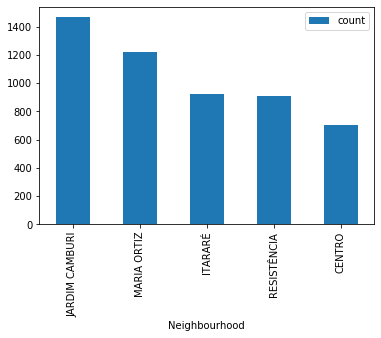

In [28]:
top5neighbourhoods = noshows.groupby(by='Neighbourhood').count()['PatientId'].reset_index(name='count').sort_values('count',ascending=False).head(5)

top5neighbourhoods.plot(kind='bar', x='Neighbourhood', y='count');

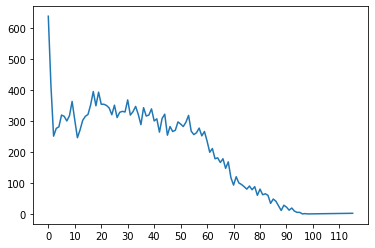

In [51]:

noshowsByAge = noshows.groupby(by='Age').count()['PatientId'].reset_index(name='count')

plt.xticks(np.arange(min(noshowsByAge['Age']), max(noshowsByAge['Age']), 10.0))
plt.plot(noshowsByAge['Age'],noshowsByAge['count'])

In [36]:
noshows[noshows['Age']==0]['PatientId'].count()

639

In [9]:
noshows.shape

(22319, 14)

In [13]:
noshows.groupby(by='Gender').count()['PatientId']

Gender
F    14594
M     7725
Name: PatientId, dtype: int64

In [35]:
noshows.groupby(by='Age').count()['PatientId'].sort_values(ascending=False)

Age
0      639
1      415
17     396
19     394
30     369
      ... 
95       6
115      3
97       2
96       1
98       1
Name: PatientId, Length: 100, dtype: int64

In [39]:
noshows.groupby(by='Scholarship').count()['PatientId']

Scholarship
0    19741
1     2578
Name: PatientId, dtype: int64

In [40]:
noshows.groupby(by='Hipertension').count()['PatientId']

Hipertension
0    18547
1     3772
Name: PatientId, dtype: int64

In [41]:
noshows.groupby(by='Diabetes').count()['PatientId']

Diabetes
0    20889
1     1430
Name: PatientId, dtype: int64

In [42]:
noshows.groupby(by='Alcoholism').count()['PatientId']

Alcoholism
0    21642
1      677
Name: PatientId, dtype: int64

In [43]:
noshows.groupby(by='Handcap').count()['PatientId']

Handcap
0    21912
1      366
2       37
3        3
4        1
Name: PatientId, dtype: int64

In [44]:
noshows.groupby(by='SMS_received').count()['PatientId']

SMS_received
0    12535
1     9784
Name: PatientId, dtype: int64

In [50]:
noshows.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [53]:
noshows=noshows[['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']]

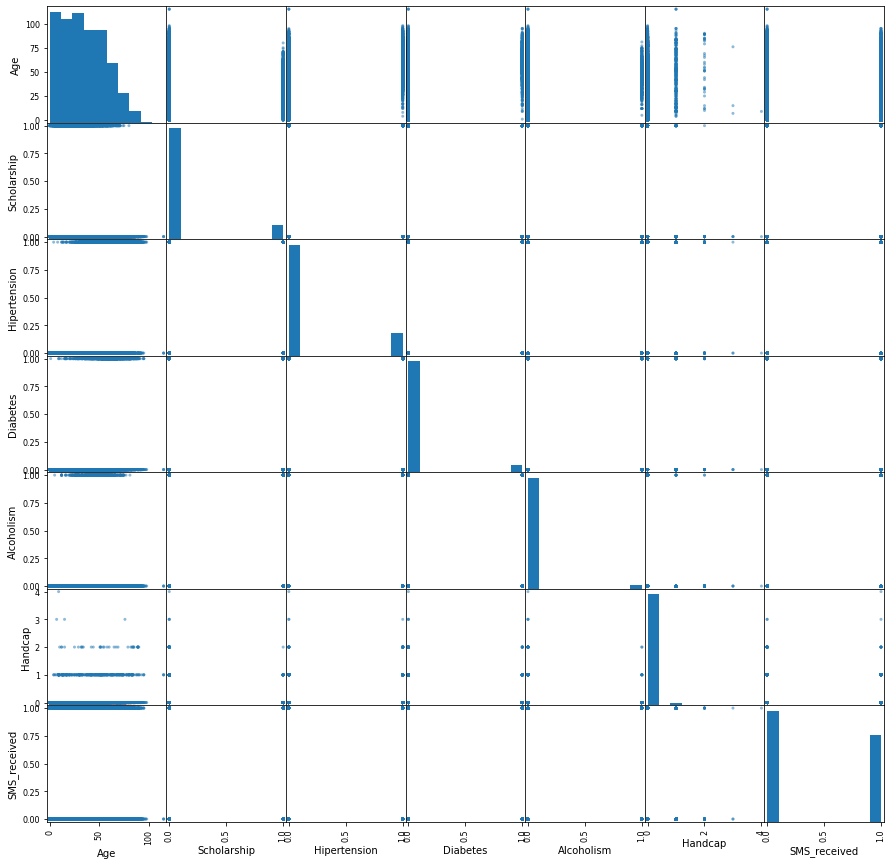

In [54]:
pd.plotting.scatter_matrix(noshows, figsize=(15,15));

In [ ]:
noshows[noshows['Age']].plot(kind='bar');

In [ ]:
noshows[noshows['Age']].plot(kind='bar');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.
